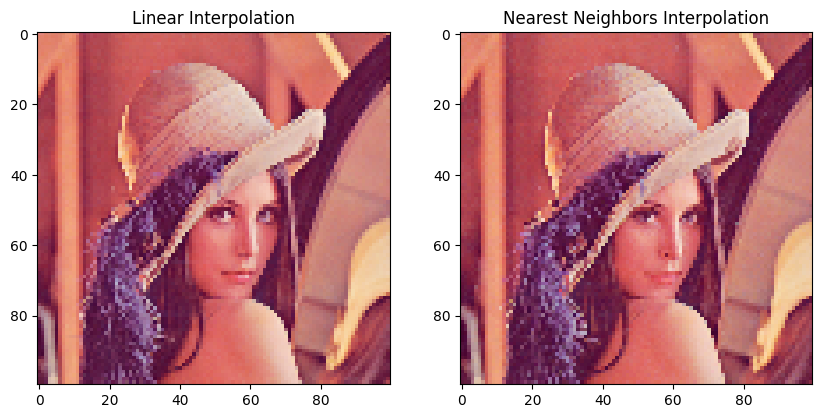

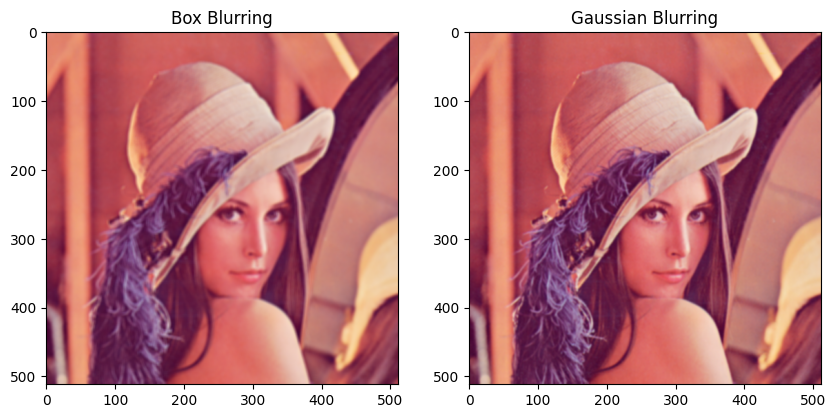


Model: Naive Bayes
Cross-Validation Accuracy: 0.839251838946961
Test Accuracy: 0.8472222222222222
Precision: 0.8750603074057791
Recall: 0.8472222222222222
F1 Score: 0.8489770318561582
Confusion Matrix: [[31  0  0  0  0  1  0  1  0  0]
 [ 0 24  0  0  0  0  0  0  3  1]
 [ 0  2 20  0  0  0  1  0 10  0]
 [ 0  0  1 29  0  1  0  0  3  0]
 [ 0  0  0  0 38  0  1  7  0  0]
 [ 0  0  0  1  0 44  1  1  0  0]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  2  0  0  0  0  0  2 26  0]
 [ 0  1  1  2  0  2  0  4  4 26]]

Model: SVM
Cross-Validation Accuracy: 0.9867716802168023
Test Accuracy: 0.9861111111111112
Precision: 0.9861882716049383
Recall: 0.9861111111111112
F1 Score: 0.9861071324368055
Confusion Matrix: [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



# Load a sample image
image = cv2.imread('/content/Lena_Image.png')

# Resize the image using different interpolation methods
image_resized_linear = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
image_resized_nearest = cv2.resize(image, (100, 100), interpolation=cv2.INTER_NEAREST)

# Display resized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Linear Interpolation')
plt.imshow(cv2.cvtColor(image_resized_linear, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Nearest Neighbors Interpolation')
plt.imshow(cv2.cvtColor(image_resized_nearest, cv2.COLOR_BGR2RGB))
plt.show()

# Apply different blurring techniques
image_blurred_box = cv2.blur(image, (5, 5))
image_blurred_gaussian = cv2.GaussianBlur(image, (5, 5), 0)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Box Blurring')
plt.imshow(cv2.cvtColor(image_blurred_box, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Gaussian Blurring')
plt.imshow(cv2.cvtColor(image_blurred_gaussian, cv2.COLOR_BGR2RGB))
plt.show()

# Task 2: Machine Learning on MNIST Dataset


data = load_digits()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}


results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    #roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else 'N/A'

    # Store results
    results[model_name] = {
        'Cross-Validation Accuracy': np.mean(cv_scores),
        'Test Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        #'ROC AUC': roc_auc
    }


for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
